# Кластеризация

In [102]:
import pandas as pd
import numpy as np
import spacy
from tqdm import tqdm
import sklearn

In [103]:
# Возьмем тексты и уберем NaN-ы
df = pd.read_csv('dataset.csv')
df = df.dropna().reset_index(drop=True)
texts = df.text
texts

0       официальный представитель главы всемирной орга...
1       заместитель генерального секретаря оон по гума...
2       так депутат прокомментировал резолюцию еп с пр...
3                           курс юаня достиг 11,331 рубля
4          им грозит лишение свободы сроком до восьми лет
                              ...                        
4167    в европе нашли страну с самым работящим населе...
4168    французский бренд продолжил открывать магазины...
4169        раскрыта цена самой дешевой квартиры в россии
4170    россияне оценили привлекательность продавцов м...
4171    система честный знак зафиксировала более 50 ми...
Name: text, Length: 4172, dtype: object

In [104]:
# Spacy токенизирует тексты и формирует векторы
spacy_model = spacy.load("ru_core_news_md")

def get_spacy_embs(texts, batch_size=32):
    embs = []
    for doc in tqdm(spacy_model.pipe(texts, batch_size=batch_size, disable=['parser', 'ner']), desc="Vectorizing...", total=len(texts)):
        embs.append(doc.vector)
    return np.array(embs)

embs = get_spacy_embs(texts)
print(embs)

Vectorizing...: 100%|██████████| 4172/4172 [00:22<00:00, 185.36it/s]

[[-0.07813262 -0.2547438   0.05539354 ... -0.15606406 -0.07977777
   0.09253327]
 [ 0.07329179 -0.29738575 -0.09194478 ... -0.14572896 -0.05982968
   0.01855558]
 [ 0.008819   -0.15475576 -0.01487162 ... -0.23606673 -0.05441271
   0.1173869 ]
 ...
 [-0.0668527  -0.16799058  0.23956023 ... -0.16802551  0.08099882
   0.31885973]
 [ 0.1334482  -0.1224997   0.12743363 ...  0.19627437 -0.02637503
   0.10507679]
 [-0.01915851 -0.03959279  0.01382963 ... -0.18433319  0.12575415
   0.15212643]]


In [105]:
from sklearn.preprocessing import StandardScaler
# масштабируем данные
embs_scaled = StandardScaler().fit_transform(embs)

In [106]:
from sklearn.cluster import DBSCAN

# Запускаем DBSCAN с подобранными параметрами
dbscan = DBSCAN(eps=0.5, min_samples=3)  # min_samples=3 для большей стабильности
cluster_labels = dbscan.fit_predict(embs_scaled)

n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)
print(f"Найдено кластеров: {n_clusters}")
print(f"Точек шума: {n_noise}")

Найдено кластеров: 435
Точек шума: 2189


Посмотрим на некоторые кластеры:

In [107]:
for i, cluster in enumerate(cluster_labels):
    if cluster == 50:
        print(texts[i])

арбитражный суд пермского края частично удовлетворил иск компании каматрансойл к торгово-чартерному фрахтователю кама шиппинг о возмещении ущерба из-за крушения танкера волгонефть-212. информация об этом размещена в картотеке арбитражных дел.
арбитражный суд пермского края частично удовлетворил иск компании каматрансойл к торгово-чартерному фрахтователю кама шиппинг о возмещении ущерба из-за крушения танкера волгонефть-212. информация об этом размещена в картотеке арбитражных дел.
арбитражный суд пермского края частично удовлетворил иск компании каматрансойл к торгово-чартерному фрахтователю кама шиппинг о возмещении ущерба из-за крушения танкера волгонефть-212. информация об этом размещена в картотеке арбитражных дел.
арбитражный суд пермского края частично удовлетворил иск компании каматрансойл к торгово-чартерному фрахтователю кама шиппинг о возмещении ущерба из-за крушения танкера волгонефть-212. информация об этом размещена в картотеке арбитражных дел.


In [108]:
for i, cluster in enumerate(cluster_labels):
    if cluster == 100:
        print(texts[i])

производство строительного кирпича в россии в 2025 году может снизиться на 7,3, до 1,81 млрд условных штук. к 2030 году падение составит 43,2 к уровню 2025-го, прогнозирует консалтинговая компания neo.
производство строительного кирпича в россии в 2025 году может снизиться на 7,3, до 1,81 млрд условных штук. к 2030 году падение составит 43,2 к уровню 2025-го, прогнозирует консалтинговая компания neo.
производство строительного кирпича в россии в 2025 году может снизиться на 7,3, до 1,81 млрд условных штук. к 2030 году падение составит 43,2 к уровню 2025-го, прогнозирует консалтинговая компания neo.
производство строительного кирпича в россии в 2025 году может снизиться на 7,3, до 1,81 млрд условных штук. к 2030 году падение составит 43,2 к уровню 2025-го, прогнозирует консалтинговая компания neo.
производство строительного кирпича в россии в 2025 году может снизиться на 7,3, до 1,81 млрд условных штук. к 2030 году падение составит 43,2 к уровню 2025-го, прогнозирует консалтинговая комп

In [109]:
n = 0
for i, cluster in enumerate(cluster_labels):
    if cluster == -1:
        if i < 5:
            print(texts[i])
        n += 1
print("Новостей без кластера:", n)

официальный представитель главы всемирной организации стефан дюжарик считает, что сейчас прорабатываются детали
заместитель генерального секретаря оон по гуманитарным вопросам том флетчер указал, что после установления перемирия всемирная организация намерена нарастить поставки помощи до сотен грузовиков в день
так депутат прокомментировал резолюцию еп с призывом разрешить украине бить западным оружием по целям в россии без ограничений и сбивать самолеты рф в воздушном пространстве евросоюза
курс юаня достиг 11,331 рубля
им грозит лишение свободы сроком до восьми лет
Новостей без кластера: 2189


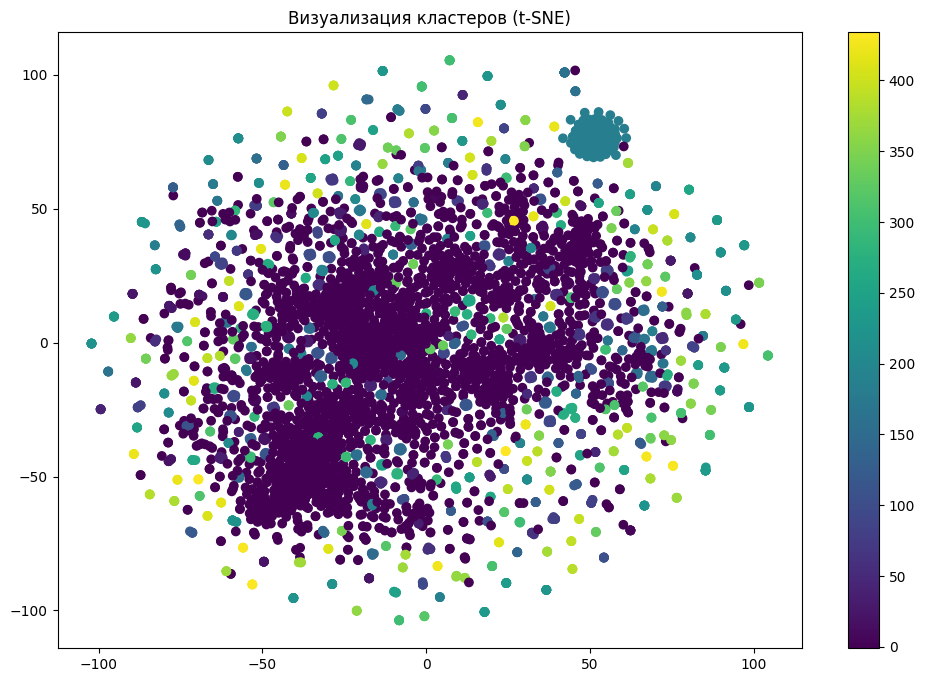

In [110]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# уменьшаем размерность для визуализации
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(embs)-1))
embs_2d = tsne.fit_transform(embs)

# визуализируем кластеры
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embs_2d[:, 0], embs_2d[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('Визуализация кластеров (t-SNE)')
plt.show()

In [111]:
# сохраняем тексты с номерами кластеров в csv
clusters = pd.DataFrame({"text": texts ,"cluster_number": cluster_labels})
clusters.to_csv('cluster_labels.csv')

# Классификация

In [115]:
df = df.dropna().reset_index(drop=True)
labels = df.polarity
len(embs), len(labels)

(4172, 4172)

Веса классов: {0: 1.015826637448259, 1: 0.5466457023060797, 2: 5.36936936936937}
📊 Gradient Boosting Results:
              precision    recall  f1-score   support

    negative       0.88      0.72      0.79       274
     neutral       0.84      0.94      0.89       509
    positive       0.94      0.63      0.76        52

    accuracy                           0.85       835
   macro avg       0.88      0.76      0.81       835
weighted avg       0.85      0.85      0.85       835



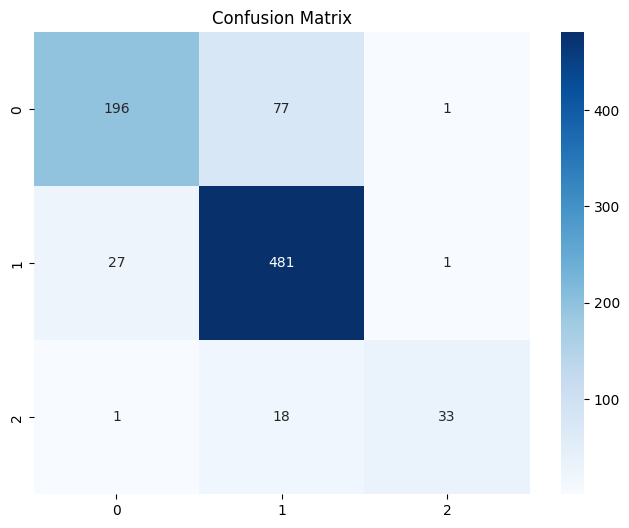

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(labels),
    y=labels
)

weights_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Веса классов:", weights_dict)

gb_model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    embs, labels, test_size=0.2, random_state=42, stratify=labels
)

gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

print("📊 Gradient Boosting Results:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [117]:
import joblib
joblib.dump(gb_model, 'gradient_boosting_sentiment_model.pkl')
print("✅ Модель сохранена как 'gradient_boosting_sentiment_model.pkl'")

✅ Модель сохранена как 'gradient_boosting_sentiment_model.pkl'
